# Ad Click Prediction


## Part 2: Advertisement click prediction.

The aim of this project is prediction of the advertisement click using the machine learning models. Based on the historical data of advertisement clicks (user behaviour, user profile, etc.) I made a model to predict who is going to click ad on a website in the future

The internet marketing is an important part of marketing strategies. The companies prefer to advertise their products on websites and social media platforms. It is important to targeting the right audience because it spending millions to display the advertisements to the audience who is not want to buy ours products can be costly.
The Ad click is important because it allows to determine whether spending their money on digital advertising is worth or not. Nowadays, different types of advertisers and search engines rely on modeling to predict ad CTR (i.e. click-through rate) accurately.

**Dataset**

The dataset comes from Kaggle: https://www.kaggle.com/datasets/arashnic/ctr-in-advertisement

Attributes:

- session_id - unique session id 
- DateTime - date time of log 
- user_id - unique user id 
- product - unique product
- campaign_id - unique campaign id
- webpage_id - unique webpage id 
- product_category_1 - unique product 1
- product_category_2 - unique product 2
- user_group_id - id of user group
- gender - gender of user
- age_level - age level of user
- user_depth 
- city_development_index 
- var_1 - unknown variable
- is_click - target

**Overview:**

The whole project is divided into 7 steps:

- Importing libraries and loading data set
- Basic data analysis
- Data cleaning  and preparation
- Spliting data into train and test set
- Building and training the model
- Testing the model accuracy
- Predictions on test data

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.pipeline import Pipeline as imbpipeline

# Model packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import pickle
import warnings
warnings.simplefilter('ignore')

## Import libriaries and data

In [2]:
df = pd.read_csv(r'C:\Python Scripts\Datasets\CTR advertisement\Ad_click_prediction_train.csv')
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [3]:
df.shape

(463291, 15)

####  First observations:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

In [5]:
print(df.columns)

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click'],
      dtype='object')


Checking unique values in each column:

In [6]:
for column in df:
    print(f'Number of unique values in {column}:', df[column].nunique())

Number of unique values in session_id: 463291
Number of unique values in DateTime: 8610
Number of unique values in user_id: 150347
Number of unique values in product: 10
Number of unique values in campaign_id: 10
Number of unique values in webpage_id: 9
Number of unique values in product_category_1: 5
Number of unique values in product_category_2: 29
Number of unique values in user_group_id: 13
Number of unique values in gender: 2
Number of unique values in age_level: 7
Number of unique values in user_depth: 3
Number of unique values in city_development_index: 4
Number of unique values in var_1: 2
Number of unique values in is_click: 2


Checking the missing values in data:

In [7]:
df.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

## Problem statement

1. Defining the problem statement:

The aim of this is to create a predict model which can shows whether an user will click on a given product advertisement or not?

- **Target Variable**: is click
- **Predictors**: DateTime, product, age_level, gender, campaign_id, webpage_id, user_depth... etc.
 
- is click = 1 means the ad was clicked.
- is click = 0 means the ad was not clicked.


2. Determining the type of Machine Learning

Based on the problem statement I will create a supervised classification model because the target variable is categorical.

## Basic data analysis

In the data ad click is marked as 'is click' where 1 = is click and 0 = no click. 

#### Ad click analysis:

In [8]:
df['is_click'].value_counts()

0    431960
1     31331
Name: is_click, dtype: int64

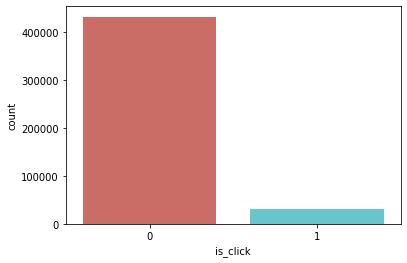

In [9]:
sns.countplot(x='is_click',data=df, palette='hls')
plt.show();

The above analysis showed that data are imbalanced, more user is not ad click than is click. When building models and their evaluation it will need to account for this.

**Calculating of click through rate (CTR):**

In [10]:
df['is_click'].value_counts()/len(df)

0    0.932373
1    0.067627
Name: is_click, dtype: float64

From above one can see the overall click through rate (CTR) is around 7% and the 93% ads is not clicked.

## Data cleaning and preparation

In the data there are rows that contain a null result so I delete missing values in gender, age_level, user_group_id, user_depth variables beacause hard to fill them another data.

In [11]:
df = df.dropna(subset=['gender','age_level', 'user_group_id', 'user_depth'])

In [12]:
df.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        351379
user_group_id                  0
gender                         0
age_level                      0
user_depth                     0
city_development_index    106886
var_1                          0
is_click                       0
dtype: int64

In [13]:
df.shape

(445048, 15)

**Feature engineering for date time features**

In [14]:
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

Extract hour from DateTime feature:

In [15]:
df['hour'] = df['DateTime'].dt.hour

Extract Day of week from DateTime feature:

In [16]:
df['day_of_week'] = df['DateTime'].apply(lambda x: x.dayofweek)

In [17]:
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,hour,day_of_week
0,140690,2017-07-02 00:00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0,0,6
1,333291,2017-07-02 00:00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0,0,6
2,129781,2017-07-02 00:00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0,0,6
3,464848,2017-07-02 00:00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0,0,6
4,90569,2017-07-02 00:01:00,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0,0,6


Filling missing values:

In [18]:
data = df.copy()

In [19]:
data["city_development_index"] = data["city_development_index"].fillna('0')
data["product_category_2"] = data["product_category_2"].fillna("0")

In [20]:
data.isnull().sum()

session_id                0
DateTime                  0
user_id                   0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
product_category_2        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
hour                      0
day_of_week               0
dtype: int64

Now I convert non numeric features into numeric features (gender and product):

In [21]:
data['gender'] = data['gender'].map({'Male' : 0, 'Female' : 1})

The 'product' variable will convert by the LabelEncoder:

In [22]:
data['product'].value_counts()

C    157822
H    104976
I     61075
D     39524
B     21262
E     20639
A     14684
J      9271
G      9144
F      6651
Name: product, dtype: int64

In [23]:
label_encoder = LabelEncoder()

In [24]:
data['product'] = label_encoder.fit_transform(data['product'])

Finally I will dropping unnecessary values which not chosen to models:

In [25]:
data = data.drop(['session_id','user_id', 'DateTime'],axis=1) 

In [26]:
data.head()

,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,hour,day_of_week
0,2,359520,13787,4,0,10.0,1,4.0,3.0,3,0,0,0,6
1,2,105960,11085,5,0,8.0,1,2.0,2.0,0,0,0,0,6
2,2,359520,13787,4,0,8.0,1,2.0,2.0,0,0,0,0,6
3,8,359520,13787,3,0,3.0,0,3.0,3.0,2,1,0,0,6
4,2,405490,60305,3,0,2.0,0,2.0,3.0,2,1,0,0,6


### Spliting data into train and test set

In this stage need to split dataset into train and test set. The data are exhibit a large imbalance in the distribution of the target classes hence I have to maintain the class proportion in the train-test sets. For this purpose I will use stratified sampling to ensure relative class frequencies is approximately preserved in each train and validation fold.

**Stratified Sampling**

Stratification makes even distribution of the target(label) in the train and test set - just as it is distributed in the original dataset. For example  the target column for the training set has 80% of 'yes' and 20% of 'no', and also, the target column for the test set has 80% of 'yes' and 20% of 'no' respectively.

In this case I will use StratifiedShuffleSplit method from sci-kit learn:

The method is combination of StratifiedKFold and ShuffleSplit. 
It generates the indices for the training and testing sets. It shuffles each time before breaking down into a training and testing set. Therefore, folds can be repetitive. But it maintains the proportion of all the classes in the testing and training sets.

In [41]:
X = np.array(data.drop(['is_click'],1))
y = np.array(data['is_click'])

In [42]:
skf = StratifiedShuffleSplit(n_splits=5, test_size=.25, random_state=0)

for train_index, test_index in skf.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

Helper functions to modelling:

In [28]:
def plot_conf_matrix(pred_set):
    """The function to plot confusion matrix"""
    plt.figure(figsize=(6,4))
    ax = sns.heatmap(confusion_matrix(y_test, pred_set),
                annot=True,fmt = "0.1f",linecolor="k",linewidths=3)
    ax.set_ylim(sorted(ax.get_xlim(), reverse=True))   

    plt.title("Confusion Matrix",fontsize=14)
    plt.show()

    
def f_score(prediction):
    """F1 score calculation"""
    f1_score = metrics.f1_score(y_test, prediction, average='weighted')
    score = round(f1_score,3)
    return score

## Build models

To build models I will use the following classification models:

- Logistic Regression,
- Linear SVC (Support Vector Classifier),
- Decision Tree,
- Random Forest,
- Ada Boosting.

To evaluate the models I will use accuracy score, F1 score and confusion matrix.

**SMOTE**

The target class variable is imbalanced, where "not click" values are more dominating then "is click". The simplest way to improve imbalanced dataset is balancing them by oversampling instances of the minority class or undersampling instances of the majority class. I will try to balancing classes by using one of the advanced techniques like the SMOTE method. The aim of the SMOTE method is to balance class distribution by randomly increasing minority class examples by replicating them.

**Standardization/Normalization of data**

In this step I scale the data so that data points are on the same level and I will use this in some algorithms (e.g. Logistic regression, SVC).

**Pipeline**

To make the scaler => SMOTE => classifier easier to work with I will use Pipeline class in scikit-learn.

**Logistic Regression:**

In [152]:
model = imbpipeline(steps=[('scaler', MinMaxScaler()),
                           ('smote', SMOTE()),
                           ('classifier', LogisticRegression(penalty='l2', C=0.01, random_state=0))])

                        
model.fit(X_train, y_train)                   

Pipeline(steps=[('scaler', MinMaxScaler()), ('smote', SMOTE()),
                ('classifier', LogisticRegression(C=0.01, random_state=0))])

In [153]:
y_pred = model.predict(X_test)
log_acc = accuracy_score(y_pred, y_test)

Measuring accuracy on Testing Data:

In [154]:
print('Accuracy on testing data: %s' % log_acc)
print(classification_report(y_test, y_pred))

Accuracy on testing data: 0.5373982132264385
              precision    recall  f1-score   support

           0       0.94      0.54      0.68    103748
           1       0.08      0.54      0.14      7514

    accuracy                           0.54    111262
   macro avg       0.51      0.54      0.41    111262
weighted avg       0.88      0.54      0.65    111262



In [155]:
print('F1 score: %s' % f_score(y_pred))

F1 score: 0.647


**Linear SVC (Support Vector Classifier)**

In [100]:
svc_model = imbpipeline(steps=[('scaler', StandardScaler()),
                               ('smote', SMOTE()),
                               ('classifier', LinearSVC(random_state=0))])

svc_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('classifier', LinearSVC(random_state=0))])

In [101]:
preds = svc_model.predict(X_test)
svc_acc = accuracy_score(preds, y_test)

In [102]:
print('accuracy: %s' % svc_acc)
print(classification_report(y_test, preds))

accuracy: 0.5374251766101634
              precision    recall  f1-score   support

           0       0.94      0.54      0.68    103748
           1       0.08      0.54      0.14      7514

    accuracy                           0.54    111262
   macro avg       0.51      0.54      0.41    111262
weighted avg       0.88      0.54      0.65    111262



In [103]:
print('F1 score: %s' % f_score(preds))

F1 score: 0.647


**Decision Tree**

In [84]:
model_tree = imbpipeline(steps=[('smote', SMOTE()),
                                ('classifier', DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=20))])

model_tree.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                        random_state=20))])

In [85]:
pred = model_tree.predict(X_test)
tree_acc = accuracy_score(pred, y_test)

In [86]:
print('accuracy: %s' % tree_acc)
print(classification_report(y_test, pred))

accuracy: 0.7760151713972425
              precision    recall  f1-score   support

           0       0.94      0.82      0.87    103748
           1       0.08      0.24      0.12      7514

    accuracy                           0.78    111262
   macro avg       0.51      0.53      0.50    111262
weighted avg       0.88      0.78      0.82    111262



In [87]:
print('F1 score: %s' % f_score(pred))

F1 score: 0.821


**Random Forest Classifier:**

In [137]:
model_rf = imbpipeline(steps=[('smote', SMOTE()),
                              ('classifier', RandomForestClassifier(max_depth=5, n_estimators=200, criterion='entropy', random_state=0))])

model_rf.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        n_estimators=200, random_state=0))])

In [138]:
pred_y = model_rf.predict(X_test)
rf_acc = accuracy_score(pred_y, y_test)

In [139]:
print('accuracy: %s' % rf_acc)
print(classification_report(y_test, pred_y))

accuracy: 0.7636749294458126
              precision    recall  f1-score   support

           0       0.94      0.80      0.86    103748
           1       0.09      0.28      0.14      7514

    accuracy                           0.76    111262
   macro avg       0.51      0.54      0.50    111262
weighted avg       0.88      0.76      0.81    111262



In [140]:
print('F1 score: %s' % f_score(pred_y))

F1 score: 0.814


**AdaBoost Classifier**

In [145]:
ada_model = imbpipeline(steps=[('smote', SMOTE()),
                               ('classifier', AdaBoostClassifier(n_estimators=200 ,random_state=0))])

ada_model.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('classifier',
                 AdaBoostClassifier(n_estimators=200, random_state=0))])

In [146]:
predict = ada_model.predict(X_test)
ada_acc = accuracy_score(predict, y_test)

In [147]:
print('accuracy: %s' % ada_acc)
print(classification_report(y_test, predict))

accuracy: 0.9047293775053478
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    103748
           1       0.12      0.06      0.08      7514

    accuracy                           0.90    111262
   macro avg       0.53      0.51      0.52    111262
weighted avg       0.88      0.90      0.89    111262



In [148]:
print('F1 score: %s' % f_score(predict))

F1 score: 0.891


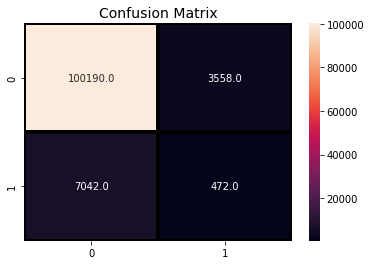

In [150]:
plot_conf_matrix(predict)

In [66]:
# Save the model
with open("adaboost_model.pkl", "wb") as model_file:
    pickle.dump(ada_model, model_file)

#### Feature Evaluation

After modelling I will check which features play the most important role in the advertisement click prediction by the use an attribute named feature_importance. It contains information about the most important features for a given classification. The analysis is based on Random Forest model 

The following code creates a plot of the top 10 features for predicting ad click:

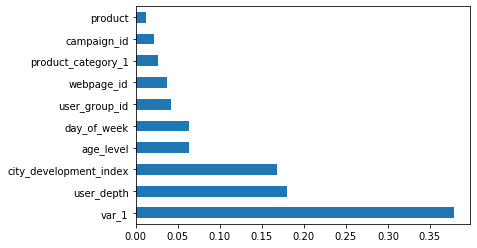

In [49]:
rf_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
rf_importances.nlargest(10).plot(kind='barh')

Based on this data one can see that var_1 has the highest impact on ad click, followed by a user_depth, city_development_index and age_level.

### Best model

To choose the best model I have tested five different algorithms and now I will check which one as well:

In [88]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Linear SVC', 'Decision Tree', 'Random Forest', 'AdaBoost'],
                      'F1_score': [0.647, 0.647, 0.821, 0.814, 0.891],
                      'Accuracy': [0.537, 0.537, 0.776, 0.763, 0.904]})

models.sort_values(by='F1_score', ascending=False)

,Model,F1_score,Accuracy
4,AdaBoost,0.891,0.904
2,Decision Tree,0.821,0.776
3,Random Forest,0.814,0.763
0,Logistic Regression,0.647,0.537
1,Linear SVC,0.647,0.537


From above calculations we see that the best model is AdaBoost classifier with F1 score of 0.89 and accuracy score of 90%. This model has achaived the best result both in F1 score and accuracy score and this is signalling the characteristics of a reasonably good model with comparision to others ones.

Interpreting the confusion matrix of the best model:

The Confusion matrix indicates that is 472+100190 correct predictions and 7042+3558 incorrect ones. One can say that the model predicted that 472 users click ad and 3558 not ad click. 

## Predictions


In the las step based on previous best trained model (AdaBoost) I will  make a predictions for ad click data. For this  analysis I will use a new test dataset without a marks click_ad_variable.

### Loading and prepare the test set:

In [67]:
df2 = pd.read_csv(r'C:\Python Scripts\Datasets\CTR advertisement\Ad_Click_prediciton_test.csv')
df2.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1


In [68]:
df2.isnull().sum()

session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64

### Preparing data

To make a prediction need to making sure the input data have same columns as it was used for training the model. Then have to preparing data the same as for training data. 

Deleting missing values in gender, age_level, user_group_id, user_depth variables:

In [69]:
df2 = df2.dropna(subset=['gender','age_level', 'user_group_id', 'user_depth'])

Extract hour, day of week from DateTime feature:

In [71]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'], errors='coerce')
df2['hour'] = df2['DateTime'].dt.hour
df2['day_of_week'] = df2['DateTime'].apply(lambda x: x.dayofweek)

Filling missing values and convert non numeric features to numeric features (gender and product):

In [72]:
df2["city_development_index"] = df2["city_development_index"].fillna('0')
df2["product_category_2"] = df2["product_category_2"].fillna("0")
df2['gender'] = df2['gender'].map({'Male' : 0, 'Female' : 1})

In [73]:
label_encoder = LabelEncoder()
df2['product'] = label_encoder.fit_transform(df2['product'])

Drop unnecessary values:

In [74]:
test = df2.drop(['session_id','user_id', 'DateTime'],axis=1) 

In [75]:
test.head()

,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,hour,day_of_week
0,9,404347,53587,1,0,5.0,0,5.0,3.0,0,0,0,5
3,6,118601,28529,5,82527,1.0,0,1.0,3.0,1,0,0,5
4,7,118601,28529,5,82527,9.0,1,3.0,1.0,0,1,0,5
5,8,118601,28529,4,82527,1.0,0,1.0,3.0,4,1,0,5
6,3,118601,28529,4,82527,2.0,0,2.0,3.0,2,1,0,5


### Generating predictions from this data:

In [78]:
test_X = np.array(test)

In [79]:
predicted = ada_model.predict(test_X)

The received prediction I mark to 'click_ prediction' variable in the dataset:

In [82]:
test['click_ prediction'] = predicted

In [83]:
test.head()

,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,hour,day_of_week,click_ prediction
0,9,404347,53587,1,0,5.0,0,5.0,3.0,0,0,0,5,0
3,6,118601,28529,5,82527,1.0,0,1.0,3.0,1,0,0,5,0
4,7,118601,28529,5,82527,9.0,1,3.0,1.0,0,1,0,5,0
5,8,118601,28529,4,82527,1.0,0,1.0,3.0,4,1,0,5,0
6,3,118601,28529,4,82527,2.0,0,2.0,3.0,2,1,0,5,0


#### Ad click prediction distribution:

In [87]:
test['click_ prediction'].value_counts()

0    120366
1      2808
Name: click_ prediction, dtype: int64

## Summary

The aimed of this project was advertisement click prediction. Firstly I've started with basic data analysis to better meet them. Then I've cleaned data and prepared to the modelling. To determined the best model I've used five different classification algorithms such as Logistic Regression, Linear SVC, Decision Tree, Random Forest and AdaBoost. Finally I've evaluated models with a F1 score, accuracy score and confusion matrix to check which model is the best. After checked all of this metrics the best classification model was AdaBoost Classifier with F1 score 0.89 and accuracy score of approximately 90%. For end the project I've made predictions on test data with the best trained model (AdaBoost). 